In [9]:
import math
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt

In [11]:
### 目标函数：
bounds = [(0,10),(0,10),(0,10),(0,10),(0,10),(0,10),
          (0,10),(0,10),(0,10),(0,10),(0,10),(0,10),
          (0,10),(0,10),(0,10),(0,10),(0,10),(0,10),
          (0,10),(0,10),(0,10),(0,10),(0,10),(0,10)]
x_opt = [1.28582343498528086e-18, 4.83460302526130664e-34, 0, 0, 6.30459929660781851e-18, 
         7.57192526201145068e-34, 5.03350698372840437e-34,9.28268079616618064e-34, 
         0, 1.76723384525547359e-17, 3.55686101822965701e-34, 2.99413850083471346e-34, 
         0.158143376337580827, 2.29601774161699833e-19, 1.06106938611042947e-18, 1.31968344319506391e-18, 
         0.530902525044209539, 0, 2.89148310257773535e-18,3.34892126180666159e-18, 0, 
         0.310999974151577319, 5.41244666317833561e-05, 4.84993165246959553e-16]
y_opt = 0.2049794002
def G20(X):
    a = [0.0693, 0.0577, 0.05, 0.2, 0.26, 0.55, 0.06, 0.1, 0.12, 0.18,
        0.1,0.09,0.0693,0.0577,0.05,0.2,0.26,0.55,0.06,0.1,0.12,0.18,
        0.1,0.09]
    b = [44.094, 58.12, 58.12, 137.4, 120.9, 170.9, 62.501, 84.94, 133.425,
        82.507,46.07,60.097,44.094,58.12,58.12,137.4,120.9,170.9,62.501,84.94,
        133.425,82.507,46.07,60.097]
    c = [123.7,31.7,45.7,14.7,84.7,27.7,49.7,7.1,2.1,17.7,0.85,0.64]
    d = [31.244,36.12,34.784,92.7,82.7,91.6,56.708,82.7,80.8,64.517,49.4,49.1]
    e = [0.1,0.3,0.4,0.3,0.6,0.3]
    y = 0.0
    for i in range(24):
        y = y + a[i]*X[i]
    g1 = (X[0]+X[12]) / (np.sum(X) + e[0])
    g2 = (X[1]+X[13]) / (np.sum(X) + e[1])
    g3 = (X[2]+X[14]) / (np.sum(X) + e[2])
    g4 = (X[6]+X[18]) / (np.sum(X) + e[3])
    g5 = (X[7]+X[19]) / (np.sum(X) + e[4])
    g6 = (X[8]+X[20]) / (np.sum(X) + e[5])
    tmp1 = 0.0
    tmp2 = 0.0
    for j in range(12,24):
        tmp1 = tmp1 + X[j]/b[j]
    for j in range(12):
        tmp2 = tmp2 + X[j]/b[j]
        
    h1 = abs(X[12] / (b[12]*tmp1) - c[0]*X[0] / (40*b[0]*tmp2))-0.0001
   
    h2 = abs(X[13] / (b[13]*tmp1) - c[1]*X[1] / (40*b[1]*tmp2))-0.0001
   
    h3 = abs(X[14] / (b[14]*tmp1) - c[2]*X[2] / (40*b[2]*tmp2))-0.0001
 
    h4 = abs(X[15] / (b[15]*tmp1) - c[3]*X[3] / (40*b[3]*tmp2))-0.0001
    
    h5 = abs(X[16] / (b[16]*tmp1) - c[4]*X[4] / (40*b[4]*tmp2))-0.0001

    h6 = abs(X[17] / (b[17]*tmp1) - c[5]*X[5] / (40*b[5]*tmp2))-0.0001
   
    h7 = abs(X[18] / (b[18]*tmp1) - c[6]*X[6] / (40*b[6]*tmp2))-0.0001
   
    h8 = abs(X[19] / (b[19]*tmp1) - c[7]*X[7] / (40*b[7]*tmp2))-0.0001
   
    h9 = abs(X[20] / (b[20]*tmp1) - c[8]*X[8] / (40*b[8]*tmp2))-0.0001
    
    h10 = abs(X[21] / (b[21]*tmp1) - c[9]*X[9] / (40*b[9]*tmp2))-0.0001
    
    h11 = abs(X[22] / (b[22]*tmp1) - c[10]*X[10] / (40*b[10]*tmp2))-0.0001
   
    h12 = abs(X[23] / (b[23]*tmp1) - c[11]*X[11] / (40*b[11]*tmp2))-0.0001
  
    h13 = abs(np.sum(X)-1) - 0.0001

    tmp3 = 0.0
    tmp4 = 0.0
    for i in range(12):
        tmp3 = tmp3 + X[i]/d[i]
    
    for i in range(12,24):
        tmp4 = tmp4 + X[i]/b[i]
    h14 = abs(tmp3 + 0.7320*530*14.7*tmp4/40-1.671)-0.0001
    
    return y,g1,g2,g3,g4,g5,g6,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14

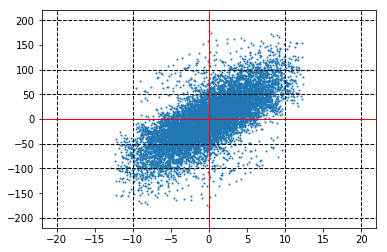

In [23]:
pN = 100
dim = 24
keth = 0.5
eta = 0.5
X = np.zeros((pN, dim))
fmax = 20
vmax = 200
for i in range(pN):
    for j in range(dim):
        X[i][j] = bounds[j][0]+(bounds[j][1]-bounds[j][0])*np.random.random()

fs = []    
Vs = []
for i in range(pN):
    for j in range(pN):
        if i != j:
            deltaf = G20(X[i])[0] - G20(X[j])[0]
            delraV = np.sum(G20(X[i])[1:22])-np.sum(G20(X[j])[1:22])
            fs.append(deltaf)
            Vs.append(delraV)

plt.scatter(fs,Vs,s=1)
plt.axhline(y=vmax, xmin=-fmax, xmax=fmax, color = "black", ls="--", lw="1")
plt.axhline(y=-vmax, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=-vmax*keth*eta, xmin=-fmax, xmax=fmax, color = "black",ls="--", lw="1")
plt.axhline(y=0, xmin=-fmax, xmax=fmax, color = "red", ls="-", lw="1")

plt.axvline(x=fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=-fmax*eta, ymin=-vmax, ymax=vmax, color = "black",ls="--", lw="1")
plt.axvline(x=0, ymin=-vmax, ymax=vmax, color = "red",ls="-", lw="1")

plt.show()